# Characterizing the Hypergraph-of-Entity - Comparing All Models

This representation model uses a weighted mixed hypergraph. Dependending on the version, the weights can be unitary constants. All versions combine directed and undirected hyperedges.

Possible node classes include:

- TermNode
- EntityNode

Possible hyperedge classes include:

- DocumentEdge
- ContainedInEdge
- RelatedToEdge
- SynonymEdge
- ContextEdge

In order to run the notebook, you must first obtain the corresponding CSV files through the `inspect` command in Army ANT. For example:

```bash
./army-ant.py inspect \
    --index-location=/opt/army-ant/indexes/inex-2009-10t-nl/hgoe \
    --index-type=hgoe \
    --workdir=/opt/army-ant/analysis/inex_2009_10t_nl-stats \
    --feature=export-node-degrees
```

You must then put the resulting files into the `data` directory for the collection and index version. For example `data/inex_2009_10t_nl/base_model` for the Hypergraph-of-Entity Base Model over the INEX 2009 3T-NL subset test collection. You should then configure the `base_dir` below accordingly. Bash scripts are provided in directory `runs/inex-2009-10t-nl/hgoe/nb-characterization`, in order to generate the required files.

In [1]:
if (!require("pacman")) install.packages("pacman")

pacman::p_load(
    tidyverse,
    logging,
    scales,
    repr,
    stringr,
    xtable
)

basicConfig()
options(warn=-1)
options(scipen=0)
options(xtable.include.rownames=FALSE)

base_dir <- "data/inex_2009_10t_nl"

Loading required package: pacman


In [2]:
ir_eval <- read_csv(file.path(base_dir, "ir_eval.csv"), col_types = cols())
ir_eval

model,map_l1,ndcg10_l1,p10_l1,map_l2,ndcg10_l2,p10_l2,map_l3,ndcg10_l3,p10_l3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Base model,0.0046,0.0799,0.04,0.0039,0.0718,0.04,0.0028,0.0576,0.04
Synonyms,0.0013,0.0440,0.02,0.0024,0.0799,0.04,0.0023,0.0718,0.04
Context,0.0000,0.0000,0.00,0.0010,0.0220,0.01,0.0010,0.0220,0.01
TF-bins_2,0.1082,0.2443,0.21,0.1025,0.1730,0.20,0.0918,0.1302,0.14
TF-bins_3,0.0911,0.2004,0.22,0.0989,0.0954,0.12,0.0868,0.0751,0.10
TF-bins_4,0.0957,0.1969,0.20,0.1107,0.2007,0.19,0.0928,0.1669,0.17
TF-bins_5,0.1049,0.2355,0.24,0.1050,0.1364,0.14,0.0954,0.1121,0.14
TF-bins_6,0.1057,0.2405,0.26,0.1108,0.1906,0.20,0.1022,0.1792,0.19
TF-bins_7,0.1000,0.2212,0.25,0.1072,0.1255,0.12,0.0939,0.0934,0.10


In [3]:
struct_feat <- read_csv(file.path(base_dir, "structural_features.csv"), col_types = cols())
struct_feat

model,nodes,edges,degree,cl_coef,avg_path_len,diameter,density
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Base model,607213,253154,0.8338,0.1148,8.3667,17,3.88e-06
Synonyms,610212,263804,0.8646,0.1168,7.5333,17,3.88e-06
Context,697068,410371,1.1774,0.1423,1.9333,3,2.75e-06
TF-bins_2,607213,268100,0.8831,0.1021,6.8333,13,7.58e-06
TF-bins_3,607213,270359,0.8905,0.1011,6.7667,13,7.65e-06
TF-bins_4,607213,272649,0.8980,0.0999,7.0333,14,7.60e-06
TF-bins_5,607213,274698,0.9048,0.0996,6.7000,16,7.73e-06
TF-bins_6,607213,276615,0.9111,0.1029,8.3000,18,7.69e-06
TF-bins_7,607213,278087,0.9159,0.1010,5.9333,14,7.82e-06


## Correlation between IR evaluation metrics and structural features

### Pearson

In [4]:
pc <- cor(ir_eval[2:ncol(ir_eval)], struct_feat[2: ncol(struct_feat)], method = "pearson"); round(pc, 4)

,nodes,edges,degree,cl_coef,avg_path_len,diameter,density
map_l1,-0.5501,-0.3852,-0.2828,-0.8480,0.2856,0.2425,0.9807
ndcg10_l1,-0.6607,-0.5314,-0.4468,-0.8732,0.4340,0.4443,0.9427
p10_l1,-0.5821,-0.4320,-0.3374,-0.8370,0.3375,0.3689,0.9503
map_l2,-0.5486,-0.3747,-0.2672,-0.8505,0.2768,0.2204,0.9886
ndcg10_l2,-0.6198,-0.5251,-0.4600,-0.7747,0.5380,0.4673,0.7661
p10_l2,-0.5702,-0.4467,-0.3668,-0.7996,0.4337,0.3370,0.8688
map_l3,-0.5445,-0.3685,-0.2599,-0.8426,0.2803,0.2321,0.9856
ndcg10_l3,-0.5450,-0.4651,-0.4096,-0.6743,0.5393,0.4903,0.6594
p10_l3,-0.5609,-0.4438,-0.3676,-0.7763,0.4730,0.4203,0.8235


In [5]:
pc > 0.5

,nodes,edges,degree,cl_coef,avg_path_len,diameter,density
map_l1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
ndcg10_l1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
p10_l1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
map_l2,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
ndcg10_l2,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE
p10_l2,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
map_l3,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
ndcg10_l3,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE
p10_l3,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE


### Spearman

In [6]:
sc <- cor(ir_eval[2:ncol(ir_eval)], struct_feat[2: ncol(struct_feat)], method = "spearman"); round(sc, 4)

,nodes,edges,degree,cl_coef,avg_path_len,diameter,density
map_l1,-0.6504,0.0559,0.0559,-0.5245,0.0979,0.1000,0.5009
ndcg10_l1,-0.6504,-0.0350,-0.0350,-0.3636,-0.1119,0.2000,0.4308
p10_l1,-0.6527,0.1018,0.1018,-0.4667,-0.0982,0.3047,0.5800
map_l2,-0.6516,0.4098,0.4098,-0.5464,0.2172,0.1449,0.8035
ndcg10_l2,-0.5913,0.0699,0.0699,-0.5804,0.2797,0.1036,0.4448
p10_l2,-0.6242,0.0035,0.0035,-0.5519,0.2882,0.0593,0.4049
map_l3,-0.6504,0.4615,0.4615,-0.4685,0.0699,0.1965,0.8932
ndcg10_l3,-0.5322,-0.0280,-0.0280,-0.5524,0.3357,0.2000,0.3573
p10_l3,-0.6242,-0.0211,-0.0211,-0.6151,0.2707,0.1993,0.3873


In [7]:
sc > 0.5

,nodes,edges,degree,cl_coef,avg_path_len,diameter,density
map_l1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
ndcg10_l1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
p10_l1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
map_l2,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
ndcg10_l2,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
p10_l2,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
map_l3,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
ndcg10_l3,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
p10_l3,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [8]:
cor(ir_eval$map_l2, struct_feat$degree, method = "spearman")

[1] 0.409808

## General statistics

In [9]:
struct_feat %>%
    filter(str_starts(model, "TF-bins")) %>%
    select(cl_coef) %>%
    range()

[1] 0.0994 0.1034

In [10]:
mean(sc[, "cl_coef"])
sd(sc[, "cl_coef"])

[1] -0.5188407

[1] 0.07534464

In [11]:
mean(sc[, "density"])
sd(sc[, "density"])

[1] 0.5336341

[1] 0.1913274

In [12]:
degree_avg <- mean(struct_feat$degree)
degree_anom_diff <- 2*sd(struct_feat$degree)
cat("Avg:", degree_avg, "\tStd Dev:", degree_anom_diff)
struct_feat %>%
    mutate(degree_anomaly=degree > abs(degree_avg + degree_anom_diff))

Avg: 0.9209167 	Std Dev: 0.1704139

model,nodes,edges,degree,cl_coef,avg_path_len,diameter,density,degree_anomaly
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
Base model,607213,253154,0.8338,0.1148,8.3667,17,3.88e-06,FALSE
Synonyms,610212,263804,0.8646,0.1168,7.5333,17,3.88e-06,FALSE
Context,697068,410371,1.1774,0.1423,1.9333,3,2.75e-06,TRUE
TF-bins_2,607213,268100,0.8831,0.1021,6.8333,13,7.58e-06,FALSE
TF-bins_3,607213,270359,0.8905,0.1011,6.7667,13,7.65e-06,FALSE
TF-bins_4,607213,272649,0.8980,0.0999,7.0333,14,7.60e-06,FALSE
TF-bins_5,607213,274698,0.9048,0.0996,6.7000,16,7.73e-06,FALSE
TF-bins_6,607213,276615,0.9111,0.1029,8.3000,18,7.69e-06,FALSE
TF-bins_7,607213,278087,0.9159,0.1010,5.9333,14,7.82e-06,FALSE


In [13]:
diam_avg <- mean(struct_feat$diameter[-3])
diam_anom_diff <- 2*sd(struct_feat$diameter[-3])
cat("Avg:", diam_avg, "\tStd Dev:", diam_anom_diff)
struct_feat %>%
    mutate(diameter_anomaly=diameter < diam_avg - diam_anom_diff)

Avg: 14.63636 	Std Dev: 4.221159

model,nodes,edges,degree,cl_coef,avg_path_len,diameter,density,diameter_anomaly
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
Base model,607213,253154,0.8338,0.1148,8.3667,17,3.88e-06,FALSE
Synonyms,610212,263804,0.8646,0.1168,7.5333,17,3.88e-06,FALSE
Context,697068,410371,1.1774,0.1423,1.9333,3,2.75e-06,TRUE
TF-bins_2,607213,268100,0.8831,0.1021,6.8333,13,7.58e-06,FALSE
TF-bins_3,607213,270359,0.8905,0.1011,6.7667,13,7.65e-06,FALSE
TF-bins_4,607213,272649,0.8980,0.0999,7.0333,14,7.60e-06,FALSE
TF-bins_5,607213,274698,0.9048,0.0996,6.7000,16,7.73e-06,FALSE
TF-bins_6,607213,276615,0.9111,0.1029,8.3000,18,7.69e-06,FALSE
TF-bins_7,607213,278087,0.9159,0.1010,5.9333,14,7.82e-06,FALSE


## Impact of extensions

### Nodes vs Edges

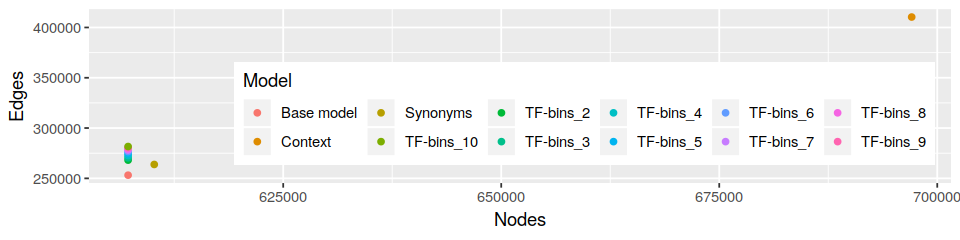

In [14]:
options(repr.plot.width=8, repr.plot.height=2)

ggplot(struct_feat, aes(x=nodes, y=edges, color=model)) +
    geom_point() +
    scale_color_discrete("Model") +
    labs(x="Nodes", y="Edges") +
    theme(legend.position = c(0.575, 0.4)) +
    guides(color=guide_legend(ncol=6))

### Structural features changes vs base model

In [15]:
struct_feat_norm <- as.matrix(struct_feat[, 2:ncol(struct_feat)])

struct_feat_norm <- sapply(1:ncol(struct_feat_norm), function(j) {
    sapply(1:nrow(struct_feat_norm), function(i) {
        #abs((struct_feat_norm[i, j] - struct_feat_norm[1, j]) / struct_feat_norm[i, j])
        (struct_feat_norm[i, j] - struct_feat_norm[1, j]) / struct_feat_norm[i, j]
    })
})

rownames(struct_feat_norm) <- NULL
colnames(struct_feat_norm) <- names(struct_feat)[2:ncol(struct_feat)]

struct_feat_norm <- as.tibble(cbind(model=struct_feat$model, as.data.frame(struct_feat_norm)))
struct_feat_norm

model,nodes,edges,degree,cl_coef,avg_path_len,diameter,density
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Base model,0.000000000,0.00000000,0.00000000,0.00000000,0.000000000,0.00000000,0.0000000
Synonyms,0.004914685,0.04037088,0.03562341,0.01712329,-0.110628808,0.00000000,0.0000000
Context,0.128904210,0.38310943,0.29182945,0.19325369,-3.327678063,-4.66666667,-0.4109091
TF-bins_2,0.000000000,0.05574786,0.05582607,-0.12438786,-0.224401095,-0.30769231,0.4881266
TF-bins_3,0.000000000,0.06363761,0.06367209,-0.13550940,-0.236452037,-0.30769231,0.4928105
TF-bins_4,0.000000000,0.07150219,0.07149220,-0.14914915,-0.189583837,-0.21428571,0.4894737
TF-bins_5,0.000000000,0.07842795,0.07847038,-0.15261044,-0.248761194,-0.06250000,0.4980595
TF-bins_6,0.000000000,0.08481463,0.08484250,-0.11564626,-0.008036145,0.05555556,0.4954486
TF-bins_7,0.000000000,0.08965899,0.08963861,-0.13663366,-0.410125900,-0.21428571,0.5038363


In [21]:
?fct_relevel

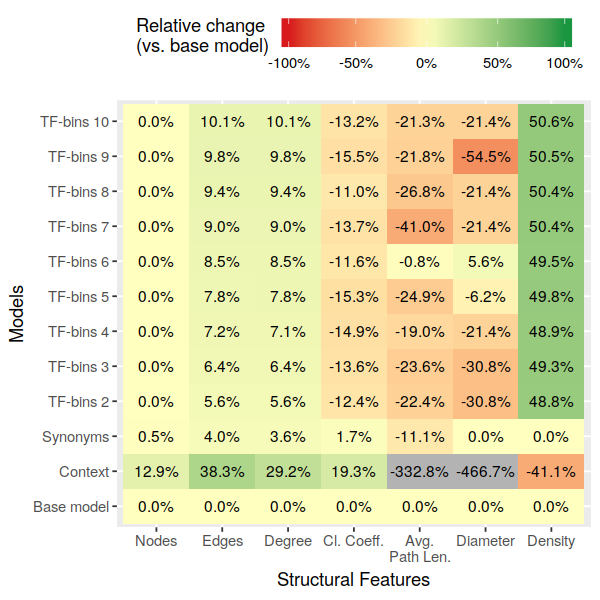

In [27]:
options(repr.plot.width=5, repr.plot.height=5)

struct_feat_norm %>%
    gather(variable, value, -model) %>%
    mutate(
        variable=fct_relevel(
            variable, "nodes", "edges", "degree", "cl_coef", "avg_path_len", "diameter", "density"),
        model=fct_relevel(str_replace_all(model, "_", " "), "TF-bins 10", after = Inf)) %>%
    mutate(variable=recode(
        variable,
        avg_path_len="Avg.\nPath Len.",
        cl_coef="Cl. Coeff.",
        degree="Degree",
        density="Density",
        diameter="Diameter",
        edges="Edges",
        nodes="Nodes"
    )) %>%
    ggplot(aes(x=variable, y=model)) +
        geom_tile(aes(fill = value)) +
        geom_text(aes(label=percent(value, accuracy = 0.1)), color="black", size=3.25) +
        labs(x="Structural Features", y="Models") +
        scale_fill_gradient2(
            name = "Relative change\n(vs. base model)", trans = "pseudo_log",
            low = "#d7191c", mid = "#ffffbf", high = "#1a9641",
            #low = "#ca0020", mid = "#f7f7f7", high = "#0571b0",
            #low = "#e66101", mid = "#f7f7f7", high = "#5e3c99",
            labels = percent, limits = c(-1, 1), na.value = "grey70") +
        theme(
            legend.position = "top", legend.key.width = unit(35, "pt"),
            legend.title = element_text(vjust = 1))

ggsave("output/compare/relative_change_vs_base_model.pdf", width = 5, height = 5)